In [57]:
!pip install wget

In [58]:
import os
import numpy as np
import pandas as pd
import wget
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


# Clean dataset umur 24-60 bulan

In [59]:
url = 'https://github.com/StuntShield/StuntShield-Stunting-Prediction-Model/raw/main/dataset/data_ideal_2460_balita.zip'

filename = wget.download(url, './data_ideal_2460_balita.zip')

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('./data_ideal_2460_balita')

In [60]:
data_2460 = pd.read_csv('./data_ideal_2460_balita/data-ideal-2460-balita.csv')
data_2460

,Jenis Kelamin,Tinggi Badan (cm),Berat Badan (kg),Status
0,laki-laki,45.0,1.700,severely wasted
1,laki-laki,45.0,1.701,severely wasted
2,laki-laki,45.0,1.702,severely wasted
3,laki-laki,45.0,1.703,severely wasted
4,laki-laki,45.0,1.704,severely wasted
...,...,...,...,...
1521923,perempuan,110.0,24.997,obesitas
1521924,perempuan,110.0,24.998,obesitas
1521925,perempuan,110.0,24.999,obesitas
1521926,perempuan,110.0,25.000,obesitas


In [61]:
data_2460.isnull().sum()

Jenis Kelamin        0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Status               0
dtype: int64

In [62]:
data_2460.describe()

,Tinggi Badan (cm),Berat Badan (kg)
count,1.521928e+06,1.521928e+06
mean,8.521947e+01,1.233423e+01
std,1.749497e+01,4.842696e+00
min,4.500000e+01,1.700000e+00
25%,7.200000e+01,8.792000e+00
50%,8.800000e+01,1.234800e+01
75%,1.005000e+02,1.576600e+01
max,1.100000e+02,2.500100e+01


In [63]:
TINGGI_BB_PB_2460=[65.0,65.5,66.0,66.5,67.0,67.5,68.0,68.5,69.0,69.5,70.0,70.5,71.0,71.5,72.0,72.5,73.0,73.5,74.0,74.5,75.0,75.5,76.0,76.5,77.0,77.5,78.0,78.5,79.0,79.5,80.0,80.5,81.0,81.5,82.0,82.5,83.0,83.5,84.0,84.5,85.0,85.5,86.0,86.5,87.0,87.5,88.0,88.5,89.0,89.5,90.0,90.5,91.0,91.5,92.0,92.5,93.0,93.5,94.0,94.5,95.0,95.5,96.0,96.5,97.0,97.5,98.0,98.5,99.0,99.5,100.0,100.5,101.0,101.5,102.0,102.5,103.0,103.5,104.0,104.5,105.0,1055,106.0,106.5,107.0,107.5,108.0,108.5,109.0,109.5,110.0,110.5,111.0,111.5,112.0,112.5,113.0,113.5,114.0,114.5,115.0,115.5,116.0,116.5,117.0,117.5,118.0,118.5,119.0,119.5,120.0]
print(len(TINGGI_BB_PB_2460))


111


In [64]:
SDM3_BB_PB_2460_LAKI_LAKI=[5.9,6.0,6.1,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,6.9,7.0,7.1,7.2,7.3,7.4,7.4,7.5,7.6,7.7,7.7,7.8,7.9,8.0,8.0,8.1,8.2,8.3,8.3,8.4,8.5,8.6,8.7,8.7,8.8,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1,12.2,12.3,12.4,12.5,12.6,12.8,12.9,13.0,13.1,13.2,13.3,13.4,13.5,13.7,13.8,13.9,14.0,14.1,14.3,14.4,14.5,14.6,14.8,14.9,15.0,15.2,15.3,15.4,15.6,15.7,15.8,16.0,16.1,16.2,16.4,16.5,16.7,16.8,16.9,17.1]
print(len(SDM3_BB_PB_2460_LAKI_LAKI))


111


In [65]:
SDM3_BB_PB_2460_PEREMPUAN=[5.6,5.7,5.8,5.8,5.9,6.0,6.1,6.2,6.3,6.3,6.4,6.5,6.6,6.7,6.7,6.8,6.9,7.0,7.0,7.1,7.2,7.2,7.3,7.4,7.5,7.5,7.6,7.7,7.8,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.5,8.6,8.7,8.8,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.0,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.9,12.0,12.1,12.2,12.3,12.4,12.5,12.6,12.8,12.9,13.0,13.1,13.3,13.4,13.5,13.7,13.8,13.9,14.1,14.2,14.4,14.5,14.7,14.8,15.0,15.1,15.3,15.4,15.6,15.7,15.9,16.0,16.2,16.3,16.5,16.6,16.8,16.9,17.1,17.3]
print(len(SDM3_BB_PB_2460_PEREMPUAN))


111


In [66]:
SDM2_BB_PB_2460_LAKI_LAKI=[6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.5,8.6,8.7,8.8,8.8,8.9,9.0,9.1,9.2,9.3,9.3,9.4,9.5,9.6,9.7,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1,12.2,12.3,12.4,12.5,12.6,12.8,12.9,13.0,13.1,13.2,13.3,13.4,13.6,13.7,13.8,13.9,14.0,14.2,14.3,14.4,14.5,14.7,14.8,14.9,15.1,15.2,15.3,15.5,15.6,15.8,15.9,16.0,16.2,16.3,16.5,16.6,16.8,16.9,17.1,17.2,17.4,17.5,17.7,17.9,18.0,18.2,18.3,18.5,18.6]
print(len(SDM2_BB_PB_2460_LAKI_LAKI))


111


In [67]:
SDM2_BB_PB_2460_PEREMPUAN=[6.1,6.2,6.3,6.4,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.1,7.2,7.3,7.4,7.5,7.6,7.6,7.7,7.8,7.9,8.0,8.0,8.1,8.2,8.3,8.4,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.9,11.0,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1,12.2,12.3,12.4,12.5,12.7,12.8,12.9,13.0,13.1,13.3,13.4,13.5,13.6,13.8,13.9,14.0,14.2,14.3,14.5,14.6,14.7,14.9,15.0,15.2,15.4,15.5,15.7,15.8,16.0,16.2,16.3,16.5,16.7,16.8,17.0,17.2,17.3,17.5,17.7,17.8,18.0,18.2,18.4,18.5,18.7,18.9]
print(len(SDM2_BB_PB_2460_PEREMPUAN))


111


In [68]:
SD1_BB_PB_2460_LAKI_LAKI=[8.1,8.2,8.3,8.5,8.6,8.7,8.8,9.0,9.1,9.2,9.3,9.5,9.6,9.7,9.8,9.9,10.0,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9,12.1,12.2,12.3,12.4,12.5,12.7,12.8,12.9,13.1,13.2,13.3,13.5,13.6,13.7,13.9,14.0,14.1,14.2,14.4,14.5,14.6,14.7,14.9,15.0,15.1,15.3,15.4,15.5,15.7,15.8,15.9,16.1,16.2,16.4,16.5,16.7,16.9,17.0,17.2,17.3,17.5,17.7,17.8,18.0,18.2,18.4,18.5,18.7,18.9,19.1,19.3,19.5,19.7,19.8,20.0,20.2,20.4,20.7,20.9,21.1,21.3,21.5,21.7,21.9,22.1,22.4,22.6,22.8,23.0,23.3,23.5,23.7,23.9,24.1,24.4,24.6]
print(len(SD1_BB_PB_2460_LAKI_LAKI))


111


In [69]:
SD1_BB_PB_2460_PEREMPUAN=[7.9,8.1,8.2,8.3,8.4,8.5,8.7,8.8,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.7,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4,11.6,11.7,11.8,11.9,12.1,12.2,12.3,12.5,12.6,12.7,12.9,13.0,13.2,13.3,13.4,13.6,13.7,13.8,14.0,14.1,14.3,14.4,14.5,14.7,14.8,14.9,15.1,15.2,15.4,15.5,15.6,15.8,15.9,16.1,16.2,16.4,16.5,16.7,16.9,17.0,17.2,17.4,17.5,17.7,17.9,18.1,18.2,18.4,18.6,18.8,19.0,19.2,19.4,19.6,19.8,20.0,20.3,20.5,20.7,20.9,21.2,21.4,21.6,21.8,22.1,22.3,22.6,22.8,23.0,23.3,23.5,23.8,24.0,24.2,24.5,24.7,25.0,25.2]
print(len(SD1_BB_PB_2460_PEREMPUAN))


111


In [70]:
SD2_BB_PB_2460_LAKI_LAKI=[8.8,8.9,9.1,9.2,9.4,9.5,9.6,9.8,9.9,10.0,10.2,10.3,10.4,10.6,10.7,10.8,11.0,11.1,11.2,11.3,11.4,11.6,11.7,11.8,11.9,12.0,12.1,12.2,12.3,12.4,12.6,12.7,12.8,12.9,13.0,13.1,13.3,13.4,13.5,13.7,13.8,13.9,14.1,14.2,14.4,14.5,14.7,14.8,14.9,15.1,15.2,15.3,15.5,15.6,15.8,15.9,16.0,16.2,16.3,16.5,16.6,16.7,16.9,17.0,17.2,17.4,17.5,17.7,17.9,18.0,18.2,18.4,18.5,18.7,18.9,19.1,19.3,19.5,19.7,19.9,20.1,20.3,20.5,20.7,20.9,21.1,21.3,21.5,21.8,22.0,22.2,22.4,22.7,22.9,23.1,23.4,23.6,23.9,24.1,24.4,24.6,24.9,25.1,25.4,25.6,25.9,26.1,26.4,26.6,26.9,27.2]
print(len(SD2_BB_PB_2460_LAKI_LAKI))


111


In [71]:
SD2_BB_PB_2460_PEREMPUAN=[8.7,8.9,9.0,9.1,9.3,9.4,9.5,9.7,9.8,9.9,10.0,10.1,10.3,10.4,10.5,10.6,10.7,10.8,11.0,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,12.0,12.1,12.2,12.3,12.4,12.6,12.7,12.8,13.0,13.1,13.3,13.4,13.5,13.7,13.8,14.0,14.2,14.3,14.5,14.6,14.8,14.9,15.1,15.2,15.4,15.5,15.7,15.8,16.0,16.1,16.3,16.4,16.6,16.7,16.9,17.0,17.2,17.4,17.5,17.7,17.9,18.0,18.2,18.4,18.6,18.7,18.9,19.1,19.3,19.5,19.7,19.9,20.1,20.3,20.5,20.8,21.0,21.2,21.4,21.7,21.9,22.1,22.4,22.6,22.9,23.1,23.4,23.6,23.9,24.2,24.4,24.7,25.0,25.2,25.5,25.8,26.1,26.3,26.6,26.9,27.2,27.4,27.7,28.0]
print(len(SD2_BB_PB_2460_PEREMPUAN))


111


In [72]:
SD3_BB_PB_2460_LAKI_LAKI=[9.6,9.8,9.9,10.1,10.2,10.4,10.5,10.7,10.8,11.0,11.1,11.3,11.4,11.6,11.7,11.8,12.0,12.1,12.2,12.4,12.5,12.6,12.8,12.9,13.0,13.1,13.3,13.4,13.5,13.6,13.7,13.8,14.0,14.1,14.2,14.4,14.5,14.6,14.8,14.9,15.1,15.2,15.4,15.5,15.7,15.8,16.0,16.1,16.3,16.4,16.6,16.7,16.9,17.0,17.2,17.3,17.5,17.6,17.8,17.9,18.1,18.3,18.4,18.6,18.8,18.9,19.1,19.3,19.5,19.7,19.9,20.1,20.3,20.5,20.7,20.9,21.1,21.3,21.6,21.8,22.0,22.2,22.5,22.7,22.9,23.2,23.4,23.7,23.9,24.2,24.4,24.7,25.0,25.2,25.5,25.8,26.0,26.3,26.6,26.9,27.2,27.5,27.8,28.0,28.3,28.6,28.9,29.2,29.5,29.8,30.1]
print(len(SD3_BB_PB_2460_LAKI_LAKI))

111


In [73]:
SD3_BB_PB_2460_PEREMPUAN=[9.7,9.8,10.0,10.1,10.2,10.4,10.5,10.7,10.8,10.9,11.1,11.2,11.3,11.5,11.6,11.7,11.8,12.0,12.1,12.2,12.3,12.5,12.6,12.7,12.8,12.9,13.1,13.2,13.3,13.4,13.6,13.7,13.9,14.0,14.1,14.3,14.5,14.6,14.8,14.9,15.1,15.3,15.4,15.6,15.8,15.9,16.1,16.3,16.4,16.6,16.8,16.9,17.1,17.3,17.4,17.6,17.8,17.9,18.1,18.3,18.5,18.6,18.8,19.0,19.2,19.3,19.5,19.7,19.9,20.1,20.3,20.5,20.7,20.9,21.1,21.4,21.6,21.8,22.0,22.3,22.5,22.7,23.0,23.2,23.5,23.7,24.0,24.3,24.5,24.8,25.1,25.4,25.7,26.0,26.2,26.5,26.8,27.1,27.4,27.8,28.1,28.4,28.7,29.0,29.3,29.6,29.9,30.3,30.6,30.9,31.2]
print(len(SD3_BB_PB_2460_PEREMPUAN))

111


## clean kelas severely wasted

### Laki-Laki

In [74]:
for i in range(len(TINGGI_BB_PB_2460)):
  severely_wasted = (
      (data_2460['Jenis Kelamin'] == 'laki-laki') &
      (data_2460['Tinggi Badan (cm)'] == TINGGI_BB_PB_2460[i]) &
      (data_2460['Berat Badan (kg)'] >= SDM3_BB_PB_2460_LAKI_LAKI[i]) &
      (data_2460['Status'] == 'severely wasted')
  )
  data_2460 = data_2460.drop(data_2460[severely_wasted].index)

### Perempuan


In [75]:
for i in range(len(TINGGI_BB_PB_2460)):
  severely_wasted = (
      (data_2460['Jenis Kelamin'] == 'perempuan') &
      (data_2460['Tinggi Badan (cm)'] == TINGGI_BB_PB_2460[i]) &
      (data_2460['Berat Badan (kg)'] >= SDM3_BB_PB_2460_PEREMPUAN[i]) &
      (data_2460['Status'] == 'severely wasted')
  )
  data_2460 = data_2460.drop(data_2460[severely_wasted].index)

## clean kelas wasted

### Laki-Laki

In [76]:
for i in range(len(TINGGI_BB_PB_2460)):
  wasted = (
      (data_2460['Jenis Kelamin'] == 'laki-laki') &
      (data_2460['Tinggi Badan (cm)'] == TINGGI_BB_PB_2460[i]) &
      ((data_2460['Berat Badan (kg)'] < SDM3_BB_PB_2460_LAKI_LAKI[i]) | (data_2460['Berat Badan (kg)'] >= SDM2_BB_PB_2460_LAKI_LAKI[i]))&
      (data_2460['Status'] == 'wasted')
  )
  data_2460 = data_2460.drop(data_2460[wasted].index)


### Perempuan

In [77]:
for i in range(len(TINGGI_BB_PB_2460)):
  wasted = (
      (data_2460['Jenis Kelamin'] == 'perempuan') &
      (data_2460['Tinggi Badan (cm)'] == TINGGI_BB_PB_2460[i]) &
      ((data_2460['Berat Badan (kg)'] < SDM3_BB_PB_2460_PEREMPUAN[i]) | (data_2460['Berat Badan (kg)'] >= SDM2_BB_PB_2460_PEREMPUAN[i]))&
      (data_2460['Status'] == 'wasted')
  )
  data_2460 = data_2460.drop(data_2460[wasted].index)


## Clean kelas normal


### Laki-Laki


In [78]:
for i in range(len(TINGGI_BB_PB_2460)):
  normal = (
      (data_2460['Jenis Kelamin'] == 'laki-laki') &
      (data_2460['Tinggi Badan (cm)'] == TINGGI_BB_PB_2460[i]) &
      ((data_2460['Berat Badan (kg)'] < SDM2_BB_PB_2460_LAKI_LAKI[i]) | (data_2460['Berat Badan (kg)'] > SD1_BB_PB_2460_LAKI_LAKI[i]))&
      (data_2460['Status'] == 'normal')
  )
  data_2460 = data_2460.drop(data_2460[normal].index)


### Perempuan


In [79]:
for i in range(len(TINGGI_BB_PB_2460)):
  normal = (
      (data_2460['Jenis Kelamin'] == 'perempuan') &
      (data_2460['Tinggi Badan (cm)'] == TINGGI_BB_PB_2460[i]) &
      ((data_2460['Berat Badan (kg)'] < SDM2_BB_PB_2460_PEREMPUAN[i]) | (data_2460['Berat Badan (kg)'] > SD1_BB_PB_2460_PEREMPUAN[i]))&
      (data_2460['Status'] == 'normal')
  )
  data_2460 = data_2460.drop(data_2460[normal].index)


## Clean kelas berisiko overwight


### Laki-Laki

In [80]:
for i in range(len(TINGGI_BB_PB_2460)):
  berisiko_overweight = (
      (data_2460['Jenis Kelamin'] == 'laki-laki') &
      (data_2460['Tinggi Badan (cm)'] == TINGGI_BB_PB_2460[i]) &
      ((data_2460['Berat Badan (kg)'] <= SD1_BB_PB_2460_LAKI_LAKI[i]) | (data_2460['Berat Badan (kg)'] > SD2_BB_PB_2460_LAKI_LAKI[i]))&
      (data_2460['Status'] == 'berisiko overweight')
  )
  data_2460 = data_2460.drop(data_2460[berisiko_overweight].index)


### Perempuan

In [81]:
for i in range(len(TINGGI_BB_PB_2460)):
  berisiko_overweight = (
      (data_2460['Jenis Kelamin'] == 'perempuan') &
      (data_2460['Tinggi Badan (cm)'] == TINGGI_BB_PB_2460[i]) &
      ((data_2460['Berat Badan (kg)'] <= SD1_BB_PB_2460_PEREMPUAN[i]) | (data_2460['Berat Badan (kg)'] > SD2_BB_PB_2460_PEREMPUAN[i]))&
      (data_2460['Status'] == 'berisiko overweight')
  )
  data_2460 = data_2460.drop(data_2460[berisiko_overweight].index)


## clean overweight

### Laki-Laki

In [82]:
for i in range(len(TINGGI_BB_PB_2460)):
  overweight = (
      (data_2460['Jenis Kelamin'] == 'laki-laki') &
      (data_2460['Tinggi Badan (cm)'] == TINGGI_BB_PB_2460[i]) &
      ((data_2460['Berat Badan (kg)'] <= SD2_BB_PB_2460_LAKI_LAKI[i]) | (data_2460['Berat Badan (kg)'] > SD3_BB_PB_2460_LAKI_LAKI[i]))&
      (data_2460['Status'] == 'overweight')
  )
  data_2460 = data_2460.drop(data_2460[overweight].index)

### Perempuan

In [83]:
for i in range(len(TINGGI_BB_PB_2460)):
  overweight = (
      (data_2460['Jenis Kelamin'] == 'perempuan') &
      (data_2460['Tinggi Badan (cm)'] == TINGGI_BB_PB_2460[i]) &
      ((data_2460['Berat Badan (kg)'] <= SD2_BB_PB_2460_PEREMPUAN[i]) | (data_2460['Berat Badan (kg)'] > SD3_BB_PB_2460_PEREMPUAN[i]))&
      (data_2460['Status'] == 'overweight')
  )
  data_2460 = data_2460.drop(data_2460[overweight].index)

##clean data obesitas

### Laki-Laki

In [84]:
for i in range(len(TINGGI_BB_PB_2460)):
  obesitas = (
      (data_2460['Jenis Kelamin'] == 'laki-laki') &
      (data_2460['Tinggi Badan (cm)'] == TINGGI_BB_PB_2460[i]) &
      (data_2460['Berat Badan (kg)'] <= SD3_BB_PB_2460_LAKI_LAKI[i])&
      (data_2460['Status'] == 'obesitas')
  )
  data_2460 = data_2460.drop(data_2460[obesitas].index)

### Perempuan

In [85]:
for i in range(len(TINGGI_BB_PB_2460)):
  obesitas = (
      (data_2460['Jenis Kelamin'] == 'perempuan') &
      (data_2460['Tinggi Badan (cm)'] == TINGGI_BB_PB_2460[i]) &
      (data_2460['Berat Badan (kg)'] <= SD3_BB_PB_2460_PEREMPUAN[i])&
      (data_2460['Status'] == 'obesitas')
  )
  data_2460 = data_2460.drop(data_2460[obesitas].index)

In [86]:
data_2460.describe()

,Tinggi Badan (cm),Berat Badan (kg)
count,1.415786e+06,1.415786e+06
mean,8.474202e+01,1.222140e+01
std,1.767440e+01,4.834445e+00
min,4.500000e+01,1.700000e+00
25%,7.150000e+01,8.674000e+00
50%,8.750000e+01,1.227600e+01
75%,1.000000e+02,1.566300e+01
max,1.100000e+02,2.470000e+01


In [87]:
data_2460.duplicated().sum()

0

In [88]:
data_2460.drop_duplicates(inplace=True)

In [89]:
data_2460.describe()

,Tinggi Badan (cm),Berat Badan (kg)
count,1.415786e+06,1.415786e+06
mean,8.474202e+01,1.222140e+01
std,1.767440e+01,4.834445e+00
min,4.500000e+01,1.700000e+00
25%,7.150000e+01,8.674000e+00
50%,8.750000e+01,1.227600e+01
75%,1.000000e+02,1.566300e+01
max,1.100000e+02,2.470000e+01


In [90]:
data_2460.isnull().sum()

Jenis Kelamin        0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Status               0
dtype: int64

# Encode Jenis Kelamin dan Status ke number

## Data umur 24-60 bulan

In [91]:
data_2460['Jenis Kelamin'] = data_2460['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})
data_2460['Status'] = data_2460['Status'].map({'severely wasted': 0, 'wasted': 1, 'normal': 2, 'berisiko overweight': 3,'overweigh' : 4,'obesitas' : 5})

data_2460

,Jenis Kelamin,Tinggi Badan (cm),Berat Badan (kg),Status
0,0,45.0,1.700,0
1,0,45.0,1.701,0
2,0,45.0,1.702,0
3,0,45.0,1.703,0
4,0,45.0,1.704,0
...,...,...,...,...
1521621,1,110.0,24.696,4
1521622,1,110.0,24.697,4
1521623,1,110.0,24.698,4
1521624,1,110.0,24.699,4


In [92]:
data_2460.isnull().sum()

Jenis Kelamin        0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Status               0
dtype: int64

#Split Data Train dan Label Da

In [93]:
dt_train_2460=data_2460.drop('Status', axis=1)

dt_train_2460

,Jenis Kelamin,Tinggi Badan (cm),Berat Badan (kg)
0,0,45.0,1.700
1,0,45.0,1.701
2,0,45.0,1.702
3,0,45.0,1.703
4,0,45.0,1.704
...,...,...,...
1521621,1,110.0,24.696
1521622,1,110.0,24.697
1521623,1,110.0,24.698
1521624,1,110.0,24.699


In [94]:
label_train_2460 = data_2460['Status']

label_train_2460

0          0
1          0
2          0
3          0
4          0
          ..
1521621    4
1521622    4
1521623    4
1521624    4
1521625    4
Name: Status, Length: 1415786, dtype: int64

In [95]:
X_train, X_val, y_train, y_val = train_test_split(dt_train_2460, label_train_2460, test_size=0.2, stratify=label_train_2460, random_state=42)

#Callbacks


In [96]:
def lr_scheduler(epoch):
    # Menghitung kecepatan pembelajaran berdasarkan epoch
    return 0.001 * np.exp(-0.1 * epoch)

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

callback = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=10,
    restore_best_weights=True
    )

In [99]:
model= models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(dt_train_2460.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_model = model.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=100,callbacks=[lr_callback,callback])

Epoch 1/100
35395/35395 [==============================] - 109s 3ms/step - loss: 0.3722 - accuracy: 0.8613 - val_loss: 0.1905 - val_accuracy: 0.9325 - lr: 0.0010
Epoch 2/100
35395/35395 [==============================] - 109s 3ms/step - loss: 0.1865 - accuracy: 0.9311 - val_loss: 0.1839 - val_accuracy: 0.9287 - lr: 9.0484e-04
Epoch 3/100
35395/35395 [==============================] - 102s 3ms/step - loss: 0.1547 - accuracy: 0.9421 - val_loss: 0.1212 - val_accuracy: 0.9551 - lr: 8.1873e-04
Epoch 4/100
35395/35395 [==============================] - 101s 3ms/step - loss: 0.1362 - accuracy: 0.9487 - val_loss: 0.1025 - val_accuracy: 0.9648 - lr: 7.4082e-04
Epoch 5/100
35395/35395 [==============================] - 101s 3ms/step - loss: 0.1245 - accuracy: 0.9532 - val_loss: 0.1202 - val_accuracy: 0.9542 - lr: 6.7032e-04
Epoch 6/100
35395/35395 [==============================] - 109s 3ms/step - loss: 0.1148 - accuracy: 0.9566 - val_loss: 0.1307 - val_accuracy: 0.9448 - lr: 6.0653e-04
Epoch 7/

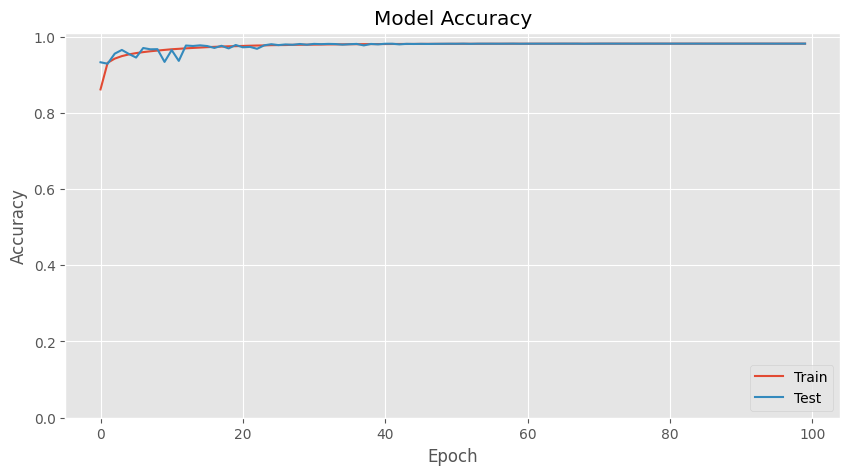

In [104]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Model Accuracy')
plt.plot(history_model.history['accuracy'], label='Accuracy')
plt.plot(history_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.01])
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

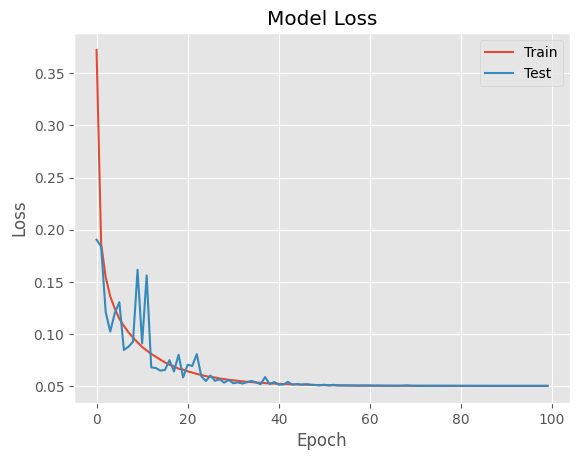

In [105]:

plt.plot(history_model.history['loss'], label='Training Loss')
plt.plot(history_model.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [107]:

model.save('./models/ideal_prediction_2460.h5')

In [ ]:
from google.colab import files

files.download('./models/ideal_prediction_2460.h5')